# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [1]:
import numpy as np  # Import the NumPy library for numerical operations, commonly aliased as 'np'
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting, commonly aliased as 'plt'
from numpy.random import random, seed  # Import 'random' for generating random floats and 'seed' for reproducibility from NumPy's random module

# Introduction
Random processes are very common in physics. When dealing with large numbers of molecules, such as in gases, we don’t describe the trajectory of every single particle ($10^{23}$ particles is too much to handle) but often use probabilities to determine the average behaviour. Here, we look at some illustrative examples of using random numbers in physical applications.

## Random walks
The random walk problem is a classic example which, despite its simplicity, describes very well the basic physical phenomenon of _diffusion_. Diffusion is a process where par- ticles which are initially concentrated in a region in space spread out with time. For example, a drop of ink in water will gradually spread to the whole volume of water, even if the water is perfectly still. This is because the individual molecules (both the ink and the water) (i) have random directions and speeds, which depend on the temperature, and (ii) also collide with each other. It turns out that these two ingredients can be modelled very easily.

## The method
We first look at a random walk in 1-D for a single particle. We start the particle off at the origin of the x-axis and assume that it moves unit distance in each time step (the molecular speed is thus 1 unit). At the end of each time step we set the direction to left or right with equal probability, mimicking the effect of collisions. You can easily write the python code, but for flexibility of later python coding, I show here how to define a function, called `walk(steps)`, which is passed a single number steps and returns a vector of that length, which contains all the positions of the random walk.

In [2]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # Initialize an array 'x' of given 'steps' length with zeros, cast to integer type
    x[0] = 0  # Set the starting position of the walker at the origin (position 0)
    for i in range(1, len(x)):  # Loop through the array starting from the second element (index 1)
        rnd = random()  # Generate a random floating-point number between 0.0 (inclusive) and 1.0 (exclusive)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # If rnd is less than 0.5, the walker moves one unit to the right
        else:
            x[i] = x[i-1] - 1  # Otherwise, the walker moves one unit to the left
    return x  # Return the array containing all the positions of the random walk

IMPORTANT: Make sure you understand how this function is used, and how it works. The rest of this worksheet is based on using it. You can also use the vectorised version below.

In [3]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    # Generate an array of 'steps' random choices: -1 (left) or 1 (right)
    x = np.random.choice([-1, 1], size=steps)
    # Calculate the cumulative sum of the steps to get the position at each step
    x = np.cumsum(x)
    return x  # Return the array containing all the positions of the random walk

# Exercises

This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video example on 2D array slicing.

## Exercise 1
Use the above function to write code for a single random walker in 1-D.

 1. [2] Plot to the screen a random walk for 1000 steps, i.e. plot out the steps (position $x$ plotted
against step number $i$).
 2. [2] Plot out as above, but this time for 100 such walks (all displayed on the same
graph). You should do this simply by writing a loop.



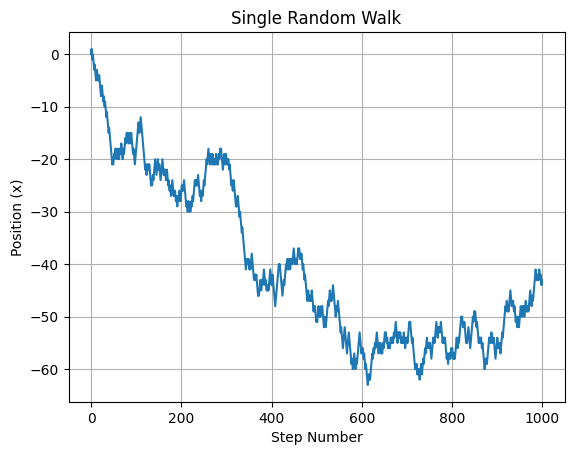

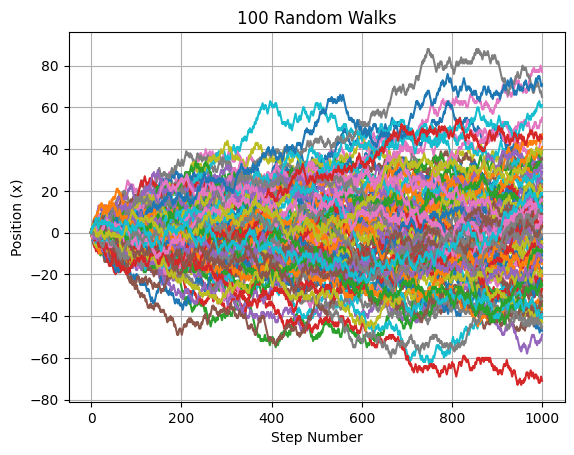

In [4]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # Initialize an array 'x' of given 'steps' length with zeros, cast to integer type
    x[0] = 0  # Set the starting position of the walker at the origin (position 0)
    for i in range(1, len(x)):  # Loop through the array starting from the second element (index 1)
        rnd = random()  # Generate a random floating-point number between 0.0 (inclusive) and 1.0 (exclusive)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # If rnd is less than 0.5, the walker moves one unit to the right
        else:
            x[i] = x[i-1] - 1 # Otherwise, the walker moves one unit to the left
    return x

# Plot a single random walk for 1000 steps
plt.plot(walk(1000))  # Call the walk function with 1000 steps and plot the resulting positions
plt.title('Single Random Walk')  # Set the title of the plot
plt.xlabel('Step Number')  # Set the label for the x-axis
plt.ylabel('Position (x)')  # Set the label for the y-axis
plt.grid(True)  # Display a grid on the plot for better readability
plt.show()  # Show the plot

# Creating a loop for 100 walks with 1000 steps
plt.figure() # Create a new figure for the next plot to avoid overwriting
for i in range(100):
    plt.plot(walk(1000)) # Call the walk function 100 times, each time plotting a new random walk

# Plotting the 100 walks all on one plot
plt.title('100 Random Walks')  # Set the title of the plot
plt.xlabel('Step Number')  # Set the label for the x-axis
plt.ylabel('Position (x)')  # Set the label for the y-axis
plt.grid(True)  # Display a grid on the plot for better readability
plt.show()  # Show the plot

## Exercise 2
You will now extend your code to allow for _multiple_ walks in a more systematic way. Do this by defining a 2-D array to contain the trajectories of `N` particles, each taking a number of steps called `steps`, i.e. define an initially empty integer array like this:
```python
particles = np.zeros((steps, N), int)
```
Which you will fill with the `steps` of each `N` particles. You may find [week 6 of PX1224](https://alexandria.astro.cf.ac.uk/Joomla-python/index.php/week-6-two-dimensional-arrays) useful, in particular "2.2. Returning parts of 2-d Arrays".

 1. [2] Calculate and then plot out the steps for 10 walkers to the screen (still use 1000 steps), all on the same plot.
 2. [2] Calculate (plot if you wish) the steps for 500 walkers. We define _for each step_ a "mean position": the average of the positions of all walkers at each step. We also define _for each step_ a "mean squared position": the average of the squares of the positions of all walkers (**not** the square of the average) at each step. Those two quantities, the "mean position" and the "mean squared position" are standard quantities in random walks. Print out the "mean position" and the "mean squared position" of the 500 walkers at the _last_ step.
 3. [4] Calculate the mean position at _each_ step, and plot it.
 4. [4] Calculate the mean squared position of the 500 walkers at _each_ step, and
plot it. What do you notice?



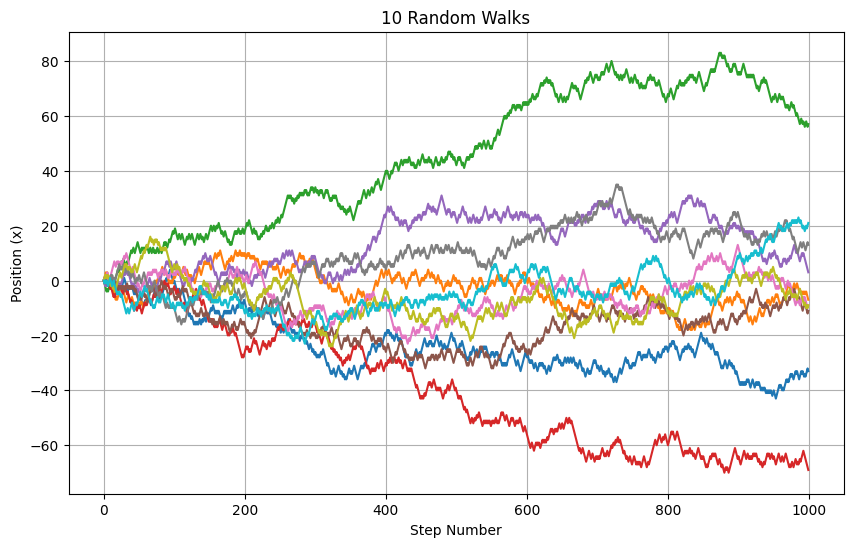

Mean Position at Last Step (500 walkers): -0.1560
Mean Squared Position at Last Step (500 walkers): 1062.6160


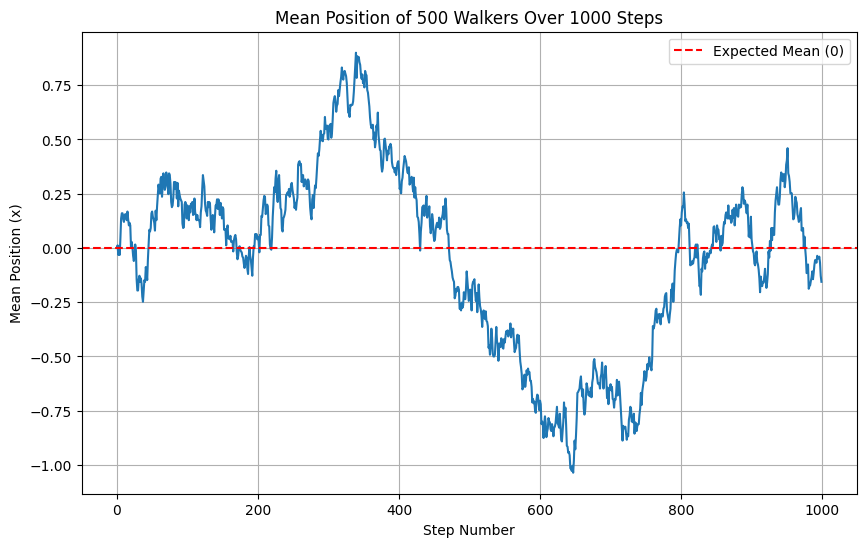

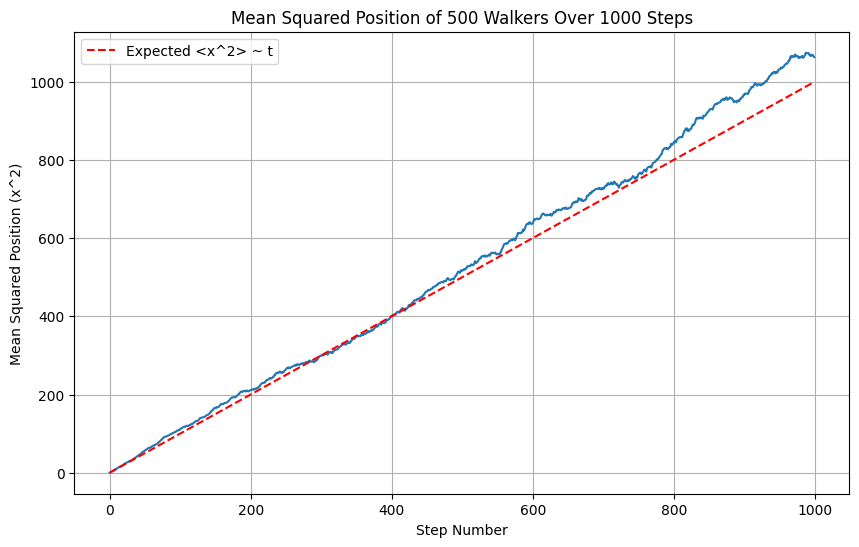

In [5]:
# creating a 2d array for 10 walkers and 1000 steps
num_steps = 1000  # Define the number of steps for each walk
num_walkers = 10  # Define the number of walkers
# Initialize a 2D NumPy array to store the positions of all walkers at each step
# The shape is (num_steps, num_walkers), initialized with integers
particles = np.zeros((num_steps, num_walkers), int)

# creating a loop to fill the 'particles' array with the position of each walker at each step
for i in range(num_walkers):
    particles[:, i] = walk(num_steps)  # For each walker, generate a random walk and assign it to a column in 'particles'

# plotting the 10 walkers with 1000 steps on a single plot
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size for better visualization
plt.plot(particles)  # Plot all columns of the 'particles' array; each column represents one walker's path
plt.title('10 Random Walks')  # Set the title of the plot
plt.xlabel('Step Number')  # Set the label for the x-axis
plt.ylabel('Position (x)')  # Set the label for the y-axis
plt.grid(True)  # Display a grid on the plot
plt.show()  # Show the plot

# 2d array for 500 walkers
num_walkers_500 = 500  # Define the new number of walkers for Exercise 2 parts 2-4
# Initialize a new 2D NumPy array for 500 walkers, similar to above
particles_500 = np.zeros((num_steps, num_walkers_500), int)

# Fill the 'particles_500' array with random walks for 500 walkers
for i in range(num_walkers_500):
    particles_500[:, i] = walk(num_steps)  # Generate a walk for each of the 500 walkers

# get positions of all 500 walkers at the last step
# Select all positions from the last row (last step) of the 'particles_500' array
last_step_positions = particles_500[-1, :]

# calculate mean position at the last step
mean_position_last_step = np.mean(last_step_positions)  # Calculate the average of the last step positions
print(f"Mean Position at Last Step (500 walkers): {mean_position_last_step:.4f}") # Print the calculated mean position

# calculate mean squared position at the last step
# square each position first, then calculate the mean
# Square each position in the 'last_step_positions' array and then calculate their average
mean_squared_position_last_step = np.mean(last_step_positions**2)
print(f"Mean Squared Position at Last Step (500 walkers): {mean_squared_position_last_step:.4f}") # Print the calculated mean squared position

# calculating mean position at each step
# Calculate the mean of positions across all walkers for each step (average along axis=1)
mean_position_at_each_step = np.mean(particles_500, axis=1)

# plotting mean position at each step
plt.figure(figsize=(10, 6))  # Create a new figure for the plot
plt.plot(mean_position_at_each_step)  # Plot the mean position over time
plt.title('Mean Position of 500 Walkers Over 1000 Steps')  # Set the title
plt.xlabel('Step Number')  # Set the x-axis label
plt.ylabel('Mean Position (x)')  # Set the y-axis label
plt.grid(True)  # Display a grid
# Add a horizontal line at y=0, representing the expected mean position for a truly random walk
plt.axhline(0, color='r', linestyle='--', label='Expected Mean (0)')
plt.legend()  # Display the legend for the expected mean line
plt.show()  # Show the plot

# calculating the mean squared position at each step
# Square all positions in the 'particles_500' array
squared_positions = particles_500**2
# Calculate the mean of squared positions across all walkers for each step
mean_squared_position_at_each_step = np.mean(squared_positions, axis=1)

# plotting the mean squared position at each step
plt.figure(figsize=(10, 6))  # Create a new figure for the plot
plt.plot(mean_squared_position_at_each_step)  # Plot the mean squared position over time
plt.title('Mean Squared Position of 500 Walkers Over 1000 Steps')  # Set the title
plt.xlabel('Step Number')  # Set the x-axis label
plt.ylabel('Mean Squared Position (x^2)')  # Set the y-axis label
plt.grid(True)  # Display a grid
# Plot a line y=x (or y=t, where t is step number) as the expected theoretical behavior for <x^2>
plt.plot(np.arange(num_steps), np.arange(num_steps), 'r--', label='Expected <x^2> ~ t')
plt.legend()  # Display the legend for the expected line
plt.show()  # Show the plot

## Exercise 3
Extend the previous exercise by plotting a histogram of particle positions. You will need to decide yourself how best to do this. You will need to use the histogram function `plt.hist`.

 1. [2] Plot a histogram at the _last_ step.
 2. [2] Plot a histogram for intermediate steps of your choice to illustrate how it changes with the number of steps. Each histogram should be saved as an image to that they can easily be viewed afterwards. (If you feel ambitious, you could make an animation, see the solution to the optional question of week 3 for an example how).


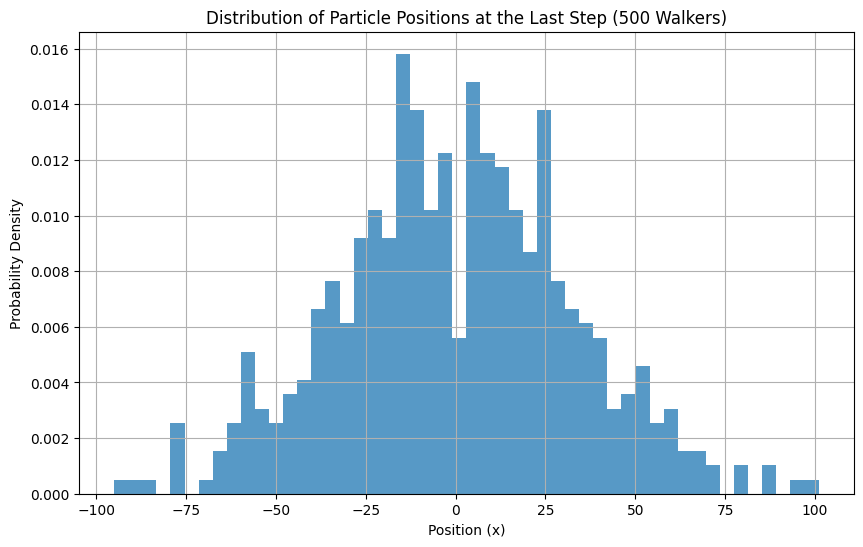

In [6]:
# plotting the histogram at the last step
plt.figure(figsize=(10, 6))  # Create a new figure for the histogram
# Plot a histogram of the last step positions with 50 bins, normalized to represent probability density
plt.hist(last_step_positions, bins=50, density=True, alpha=0.75)
plt.title('Distribution of Particle Positions at the Last Step (500 Walkers)')  # Set the title
plt.xlabel('Position (x)')  # Set the x-axis label
plt.ylabel('Probability Density')  # Set the y-axis label
plt.grid(True)  # Display a grid
plt.show()  # Show the plot

import os  # Import the 'os' module for operating system related functionalities, like directory creation

# Create a directory to save the histograms if it doesn't exist
output_dir = 'histograms'  # Define the name of the output directory
if not os.path.exists(output_dir):  # Check if the directory already exists
    os.makedirs(output_dir)  # If not, create the directory

# Define a list of intermediate steps at which to plot histograms
intermediate_steps = [100, 500, num_steps - 1]

for step in intermediate_steps:  # Loop through each defined intermediate step
    # Get positions of all 500 walkers at the current step
    current_step_positions = particles_500[step, :]  # Select the row corresponding to the current step

    plt.figure(figsize=(10, 6))  # Create a new figure for each histogram
    # Plot the histogram for the current step's positions
    plt.hist(current_step_positions, bins=50, density=True, alpha=0.75)
    plt.title(f'Distribution of Particle Positions at Step {step+1} (500 Walkers)')  # Set dynamic title
    plt.xlabel('Position (x)')  # Set the x-axis label
    plt.ylabel('Probability Density')  # Set the y-axis label
    plt.grid(True)  # Display a grid

    # Save the plot as an image
    filename = os.path.join(output_dir, f'histogram_step_{step}.png')  # Construct the filename for saving
    plt.savefig(filename)  # Save the current figure to the specified file
    plt.close()  # Close the figure to free up memory, especially important in loops

In [7]:
import os

# Create a directory to save the histograms if it doesn't exist
output_dir = 'histograms'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

intermediate_steps = [100, 500, num_steps - 1] # Example intermediate steps: 100, 500, and the last step (999)

for step in intermediate_steps:
    # Get positions of all 500 walkers at the current step
    current_step_positions = particles_500[step, :]

    plt.figure(figsize=(10, 6))
    plt.hist(current_step_positions, bins=50, density=True, alpha=0.75)
    plt.title(f'Distribution of Particle Positions at Step {step+1} (500 Walkers)')
    plt.xlabel('Position (x)')
    plt.ylabel('Probability Density')
    plt.grid(True)

    # Save the plot as an image
    filename = os.path.join(output_dir, f'histogram_step_{step}.png')
    plt.savefig(filename)
    plt.close() # Close the figure to free memory
    print(f"Histogram for step {step+1} saved to {filename}")

print("Histograms for intermediate steps have been generated and saved.")

Histogram for step 101 saved to histograms/histogram_step_100.png
Histogram for step 501 saved to histograms/histogram_step_500.png
Histogram for step 1000 saved to histograms/histogram_step_999.png
Histograms for intermediate steps have been generated and saved.
